# Random number generation and statistics

In this unit, we examine how to generate random numbers for various
probability distributions in NumPy. Additionally, we take a look
at SciPy's `stats` package which implements PDFs and other functions
for numerous probability distributions.

## Random number generators

Currently, there are several ways to draw random numbers in Python:

1.  The *new* programming interface implemented in NumPy, introduced
    in version 1.17 (the current version as of this writing
    is 1.23)
    [[official documentation](https://numpy.org/doc/stable/reference/random/generator.html)].
2.  The *legacy* programming interface implemented in NumPy
    [[official documentation](https://numpy.org/doc/stable/reference/random/legacy.html)].

    While these functions have been superseded by the new implementation,
    they continue to work.
    If you are familiar with the legacy interface, you can read about
    what has changed in the new interface [here](https://numpy.org/doc/stable/reference/random/new-or-different.html).
3.  The Python standard library itself also includes random number generators
    in the `random` module [[official documentation](https://docs.python.org/3/library/random.html#random.random)].

    We won't be using this implementation at all,
    since for our purposes `numpy.random` is preferable
    as it supports NumPy arrays.

The programming interface for generating random numbers in NumPy
changed substantially in release 1.17.
We discuss the new interface in this unit since it offers
several advantages, including faster algorithms for some distributions.
Moreover, one would expect the legacy interface to be
removed at some point in the future.
However, most examples you will find in textbooks and on the internet
are likely to use the old variant.

**A note on random-number generation**

Computers usually cannot draw
truly random numbers, so we often talk about *pseudo-random number
generators* (PRNG). Given an initial seed, these PRNGs will always produce
the same sequence of "random" numbers, at least if run on the
same machine, using the same underlying algorithm, etc.
For scientific purposes this is actually desirable as it allows us
to create reproducible results. For simplicity, we will nevertheless
be using the terms "random number" and "random number generator" (RNG),
omitting the "pseudo" prefix.

### Simple random data generation

Before we can generate any random numbers using the new interface, we need 
to obtain an RNG instance. We can get the default RNG by calling
[`default_rng()`](https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng)
as follows:


In [1]:
# import function that returns the default RNG
from numpy.random import default_rng

# get an instance of the default RNG
rng = default_rng()

Let's begin with the most simple case, which uses the [`random()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html)
function to draw numbers that are uniformly distributed
on the half-open interval $[0.0, 1.0)$.

In [2]:
from numpy.random import default_rng
rng = default_rng()         # obtain default RNG implementation

rng.random(5)               # return array of 5 random numbers

array([0.39741102, 0.56797255, 0.6685921 , 0.6376025 , 0.13952912])

Calling `random()` this way will return a different set of
numbers each time (this might, for example, depend on the system time).
To obtain the same draw each time, we can pass an initial *seed* when
creating an instance of the RNG like this:

In [3]:
seed = 123
rng = default_rng(seed)     # obtain default RNG implementation,
                            # initialise seed
                            
rng.random(5)               # return array of 5 random numbers

array([0.68235186, 0.05382102, 0.22035987, 0.18437181, 0.1759059 ])

The `seed` argument needs to be an integer or an array of integers.
This way, each call gives the same numbers, as can easily be illustrated
with a loop:

In [4]:
seed = 123
for i in range(5):
    rng = default_rng(seed)
    print(rng.random(5))

[0.68235186 0.05382102 0.22035987 0.18437181 0.1759059 ]
[0.68235186 0.05382102 0.22035987 0.18437181 0.1759059 ]
[0.68235186 0.05382102 0.22035987 0.18437181 0.1759059 ]
[0.68235186 0.05382102 0.22035987 0.18437181 0.1759059 ]
[0.68235186 0.05382102 0.22035987 0.18437181 0.1759059 ]


You can remove the `seed` to verify that the set of number will then differ
in each iteration.

Alternatively, we might want to draw random integers by calling
[`integers()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html), which returns numbers from a "discrete uniform"
distribution on a given interval:

In [5]:
rng.integers(2, size=5)         # vector of 5 integers from set {0, 1}
                                # here we specify only the (non-inclusive)
                                # upper bound 2

array([0, 1, 0, 1, 0])

Alternatively, we can specify the lower and upper bounds like this:

In [6]:
rng.integers(1, 10, size=5)     # specify lower and upper bound

array([3, 8, 8, 8, 9])

Following the usual convention in Python, the upper bound is 
not included by default. We can change this by 
additionally passing `endpoint=True`:

In [7]:
rng.integers(1, 10, size=5, endpoint=True)      # include upper bound

array([1, 6, 3, 3, 3])

We can create higher-order arrays by passing a list or tuple as the
`size` argument:

In [8]:
rng.random(size=[2, 5])             # Create 2x5 array of floats
                                    # on [0.0, 1.0)

array([[0.21376296, 0.74146705, 0.6299402 , 0.92740726, 0.23190819],
       [0.79912513, 0.51816504, 0.23155562, 0.16590399, 0.49778897]])

In [9]:
rng.integers(2, size=[2,3,4])       # Create 2x3x4 array of integers {0,1}


array([[[1, 0, 1, 0],
        [0, 0, 0, 0],
        [0, 0, 1, 0]],

       [[1, 0, 1, 1],
        [1, 1, 1, 0],
        [0, 0, 1, 0]]])

**Legacy interface**

For completeness, let's look how you would accomplish the same using
the *legacy* NumPy interface.

To draw floats on the unit interval, we use [`random_sample()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random_sample.html):

In [10]:
from numpy.random import random_sample, randint, seed
seed(123)
random_sample(5)

array([0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897])

Random integers can be generated using [`randint()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html):

In [11]:
randint(2, size=5)      # draw random integers from {0,1}

array([1, 1, 0, 1, 0])

The legacy interface defines global functions `seed`, `random_sample`, etc.
within the `numpy.random` module, which are implicitly associated with
a global RNG object. This implicit association has been removed in the
new programming model and you now have to obtain an RNG instance explicitly,
for example by using the `default_rng()` function, as demonstrated above.


### Drawing random numbers from distributions

Often we want to draw random numbers from a specific distribution,
such as the normal or log-normal distributions. The RNGs in `numpy.random`
support a multitude of distributions, including:

-   `binomial()`
-   `exponential()`
-   `normal()`
-   `lognormal()`
-   `multivariate_normal()`
-   `uniform()`

and many others. For a complete list, see the [official documentation](https://numpy.org/doc/stable/reference/random/generator.html#distributions).

We will illustrate the use of these functions for the normal and
multivariate normal distributions. For example, you can draw
from the normal distribution with mean $\mu=1.0$ and standard deviation
$\sigma=0.5$ using [`normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html) as follows:

Text(0.5, 1.0, 'Histogram of normal draws')

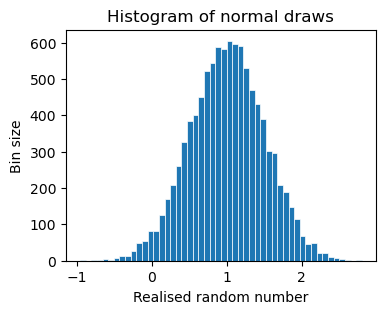

In [12]:
from numpy.random import default_rng
rng = default_rng(123)

# location and scale parameters of normal distribution
mu = 1.0
sigma = 0.5

# Draw 10000 normal numbers;
# mean and std. are passed as loc and scale arguments
x = rng.normal(loc=mu, scale=sigma, size=10000)

# plot the results
import matplotlib.pyplot as plt
plt.hist(x, bins=50, linewidth=0.5, edgecolor='white')
plt.xlabel('Realised random number')
plt.ylabel('Bin size')
plt.title('Histogram of normal draws')

To draw from the multivariate normal, we need to specify a vector
of means $\mu$ and the variance-covariance matrix $\Sigma$, which we set to

$$
\mu = \begin{bmatrix} 0 \\ 1\end{bmatrix}, \qquad 
\Sigma=\begin{bmatrix} \sigma_1^2 & \rho \sigma_1\sigma_2 \\ \rho\sigma_1\sigma_2 & \sigma_2^2\end{bmatrix}
$$

with $\sigma_1 = 0.5$, $\sigma_2 = 1.0$ and $\rho = 0.5$.
We call [`multivariate_normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.multivariate_normal.html)
to draw a sample:

Text(0.5, 1.0, 'Draws from bivariate normal distribution')

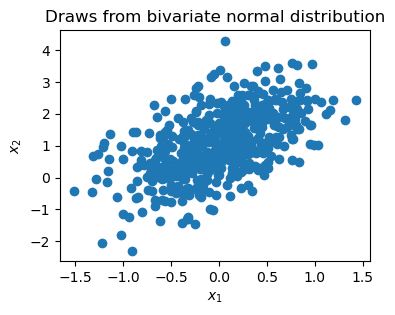

In [13]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt

rng = default_rng(123)

mu = np.array((0.0, 1.0))       # vector of means
sigma1 = 0.5                    # Std. dev. of first dimension
sigma2 = 1.0                    # Std. dev. of second dimension
rho = 0.5                       # Correlation coefficient

# Compute covariance
cov = rho * sigma1 * sigma2

# Create variance-covariance matrix
vcv = np.array([[sigma1**2.0, cov],
                [cov, sigma2**2.0]])

# Draw MVN random numbers:
# each row represents one sample draw.
x = rng.multivariate_normal(mean=mu, cov=vcv, size=500)

# Scatter plot of sample
plt.scatter(x[:, 0], x[:, 1])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Draws from bivariate normal distribution')

***
## More functions for probability distributions

NumPy itself only implements distribution-specific RNGs. Frequently, we want
to evaluate probability density functions (PDFs), cumulative distribution
functions (CDFs) or compute some moments such as the mean of a random
variable following some distribution. The SciPy project implements
these functions for a wide range of discrete and continuous univariate
distributions as well as for a few multivariate ones
in the `scipy.stats` package.

The most useful functions include:

-   `pdf()`: probability density function
-   `cdf()`: cumulative distribution function
-   `ppf()`: percent point function (inverse of `cdf`)
-   `moment()`: non-central moment of some order $n$
-   `expect()`: expected value of a function (of one argument) with
    respect to the distribution

The parameters that need to be passed to these functions are distribution
dependent. See the [official documentation](https://docs.scipy.org/doc/scipy/reference/stats.html)
for details.

*Examples:*

We can overlay the histogram of normal draws with the actual normal
PDF using SciPy's [`norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) 
distribution as follows:

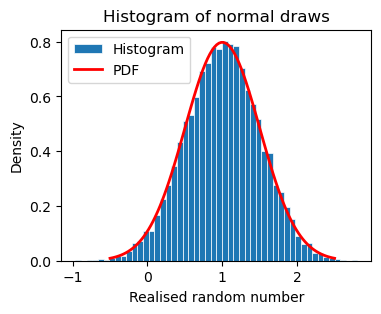

In [14]:
from numpy.random import default_rng
from scipy.stats import norm                # import normal distribution
import matplotlib.pyplot as plt
rng = default_rng(123)

# location and scale parameters of normal distribution
mu = 1.0
sigma = 0.5

# Draw 10000 normal numbers
x = rng.normal(loc=mu, scale=sigma, size=10000)    # mean and std. are passed as
                                                   # loc and scale arguments

# plot histogram
plt.hist(x, bins=50, density=True, linewidth=0.5, edgecolor='white',
         label='Histogram')

# Create x-values for PDF plot, using mean +/- 3 std.
xvalues = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
# Compute PDF of normal distr. at given x-values
pdf = norm.pdf(xvalues, loc=mu, scale=sigma)
# Plot PDF
plt.plot(xvalues, pdf, linewidth=2.0, color='red', label='PDF')
plt.xlabel('Realised random number')
plt.ylabel('Density')
plt.title('Histogram of normal draws')
plt.legend()

In the above example we pass `density=True` to Matplotlib's
`hist()` plotting function so that the result is rescaled to
be comparable to the actual PDF.

Sometimes we need to compute the expectation of a function $g(x)$
with respect to a given distribution with PDF $f(x)$ on some
interval $(a,b)$:

$$E[g(x)] = \int_a^b g(x) f(x) dx$$

For example, we might want to know the mean of a *truncated* normal
with parameters $\mu=0$, $\sigma=1.0$ with support on $(-\infty,0)$,
i.e.

$$E[x| x \leq 0] = \int_{-\infty}^0 x \frac{f(x)}{F(0)}dx$$

where $f(x)$ and $F(x)$ are the PDF and CDF of the standard normal.
We can compute it as follows:

In [15]:
from scipy.stats import norm
import numpy as np

lb = -np.inf            # integration lower bound
ub = 0.0                # integration upper bound

mu = 0.0                # mean of the (untruncated) normal
sigma = 1.0             # std. dev. of the (untruncated) normal

cdf0 = norm.cdf(0.0, loc=mu, scale=sigma)       # CDF at 0

# Compute conditional expected value
Ex = norm.expect(lambda x: x/cdf0, loc=mu, scale=sigma, lb=lb, ub=ub)
Ex                      # print conditional expectation

-0.7978845608028651

Here we define the function to be integrated as $g(x) = \frac{x}{F(0)}$,
and we pass it to `expect()` as a lambda expression.

We can alternatively let `expect()` do the conditioning automatically
by specifying `conditional=True`, and then we 
don't even need to apply the scaling factor $\frac{1}{F(0)}$:


In [16]:
norm.expect(lambda x: x, loc=mu, scale=sigma, lb=lb, ub=ub, 
            conditional=True)

-0.7978845608028643

***
## Statistics functions

In the previous section we examined functions associated with specific
distributions. Additionally, there are numerous routines to process
*sample* data which are spread across NumPy and SciPy.

In NumPy, the most useful routines include:

-   [`np.mean()`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html),
    [`np.average()`](https://numpy.org/doc/stable/reference/generated/numpy.average.html): sample mean;
    the latter variant can also compute weighted means.
-   [`np.std()`](https://numpy.org/doc/stable/reference/generated/numpy.std), 
    [`np.var()`](https://numpy.org/doc/stable/reference/generated/numpy.var.html): 
    sample standard deviation and variance
-   [`np.percentile()`](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html), 
    [`np.quantile()`](https://numpy.org/doc/stable/reference/generated/numpy.quantile.html): 
    percentiles or quantiles of a given array
-   [`np.corrcoef()`](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html): 
    Pearson correlation coefficient
-   [`np.cov()`](https://numpy.org/doc/stable/reference/generated/numpy.cov.html): 
    sample variance-covariance matrix
-   [`np.histogram()`](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html): 
    histogram of data. This only bins the data,
    as opposed to Matplotlib's `hist()` which plots it.

In addition, there are the variants `np.nanmean()`, `np.nanstd()`, `np.nanvar()` 
`np.nanpercentile()` and `np.nanquantile()`
which ignore `NaN` values.
You can find the full list of routines in the [official documentation](https://numpy.org/doc/stable/reference/routines.statistics.html).

On top of that, the `scipy.stats` package contains functions to compute all
sorts of descriptive
statistics and statistical hypothesis tests. Many of these routines
are too specific to be listed here, so have a look at
the [official documentation](https://docs.scipy.org/doc/scipy/reference/stats.html#summary-statistics)
if you need to perform statistical analysis of your sample data.

*Examples:*

To compute the pairwise correlations of a sample drawn from a multivariate
normal distribution we proceed as follows:

In [17]:
import numpy as np
from numpy.random import default_rng

rng = default_rng(123)

# vector of multivariate normal means
mu = np.array([-1.0, 1.0])

sigma1 = 0.5                    # Std. dev. of first dimension
sigma2 = 1.0                    # Std. dev. of second dimension
rho = 0.5                       # Correlation coefficient

# Compute covariance
cov = rho * sigma1 * sigma2

# variance-covariance matrix
vcv = np.array([[sigma1**2.0, cov],
                [cov, sigma2**2.0]])

# Draw some multivariate normal random numbers
x = rng.multivariate_normal(mean=mu, cov=vcv, size=1000)

# Compute correlation coefficient
np.corrcoef(x.T)        # expects each row to contain one variable

array([[1.        , 0.51768322],
       [0.51768322, 1.        ]])

Depending on the sample size, the correlation coefficient reported
in the off-diagonal elements might or might not be close to the $\rho$
used to draw the random data.

In the next example, we demonstrate how to compute some descriptive
statistics using SciPy's [`describe()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html) 
for a sample drawn from a 3-dimensional multivariate normal distribution:

In [18]:
import scipy.stats
import numpy as np
from numpy.random import default_rng

rng = default_rng(123)

# vector of multivariate normal means
mu = np.array([-1.0, 0.0, 1.0])

# variance-covariance matrix
vcv = np.array([[1.0, 0.5, 0.2],
                [0.5, 2.0, 0.7],
                [0.2, 0.7, 0.5]])

# Draw some multivariate normal random numbers
x = rng.multivariate_normal(mean=mu, cov=vcv, size=100)

# Compute some descriptive statistics
nobs, minmax, mean, variance, skewness, kurtosis = scipy.stats.describe(x)
mean        # array of means

array([-0.98486214, -0.0719401 ,  0.99084898])

In [19]:
variance    # array of variances

array([0.80017787, 1.96834418, 0.37118602])

To illustrate how to use one of the many tests implemented
in `scipy.stats`, we compute the [Jarque-Bera test](https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test)
statistic using [`jarque_bera()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.jarque_bera.html). 
This is a goodness-of-fit test
to assess whether a sample has zero skewness and excess kurtosis
and could thus be normally distributed.

In [20]:
from scipy.stats import jarque_bera
from numpy.random import default_rng

rng = default_rng(123)

# Draw from univariate normal
x = rng.normal(loc=1.0, scale=2.0, size=10000)

# Compute Jarque-Bera test statistic
jb_stat, pvalue = jarque_bera(x)
print(f'Test statistic: {jb_stat:.3f}, p-value: {pvalue:.3f}')

Test statistic: 3.472, p-value: 0.176


With a p-value of about 0.18 we cannot reject the null hypothesis
of zero skewness and zero excess kurtosis.

***

## Exercises

The following exercises are considerably longer than those in previous units. The reason is that they incorporate everything we have covered so far,
and we are finally able to use larger data sets (albeit only randomly generated ones) instead of just calling `np.arange(5)` all the time.
In this sense, the exercises are starting to resemble (simplified) real-world applications.

### Exercise 1: Histograms for increasing sample sizes

In this exercise, we plot histograms against the actual PDF of a [standard-t](https://en.wikipedia.org/wiki/Student%27s_t-distribution) distributed
random variable for increasing sample sizes.

Consider the standard-t distribution with 20 degrees of freedom (this is the only
parameter of this distribution):

- To draw samples from this distribution, use NumPy RNG's [`standard_t()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.standard_t.html) method.
- To plot the PDF of this distribution, use the [`t`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html) distribution from
    `scipy.stats`. You can import it as follows

    ```
    from scipy.stats import t as standard_t
    ```
    It is a good idea to assign more descriptive names to imported symbols
    than a `t`.

Perform the following tasks:

1.  Draw random samples from the standard-t distribution for 
    a sequence of increasing sample sizes of 50, 100, 500, 1000, 5000 and 10000.
2.  Create a single figure with 6 panels in which you plot a histogram
    of the samples you have drawn. Use matplotlib's
    [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function
    to do this, and pass the argument `bins = 50` so that each panel
    uses the same number of bins.
3.  Add the actual PDF of the standard-t distribution to each panel.
    To evaluate the PDF, use the `pdf()` method of the `t` distribution you
    imported from `scipy.stats`.


### Exercise 2: Moments of truncated normal

In this exercise, you are asked to compute the second non-central moment 
of a truncated normal distribution.

Consider a truncated normal distribution with support on the interval
$[a,b]$ with $a = \mu-2\sigma$ and $b=\mu+2\sigma$. 
Assume the underlying (untruncated) normal distribution 
has mean $\mu = 0$ and variance $\sigma^2 = 1$. Compared to the 
untruncated normal PDF, the
truncated PDF is rescaled upwards so that it integrates to 1,
as illustrated in the following figure:

![PDF of truncated normal](solutions/unit07/unit07_ex2_PDF.svg)


Compute the second non-central moment $E[X^2]$ in four different ways:

1.  Use the fact that $Var(X) = E[X^2] - E[X]^2$. Call the methods
    `mean()` and `var()` of the [truncated normal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.truncnorm.html) implemented in SciPy
    to compute the (squared) mean and variance.

    *Hint:* Import the truncated normal as follows:

    ```
    from scipy.stats import truncnorm
    ```
2.  Use the `moment()` method of SciPy's truncated normal to directly compute 
    the desired moment.
3.  Use the `expect()` method of SciPy's truncated normal to compute the 
    expectation $E[X^2]$.
4.  Use [Monte Carlo integration](https://en.wikipedia.org/wiki/Monte_Carlo_integration) 
    to compute the expectation $E[X^2]$. 
    There are numerous ways to do MC integration.
    In this exercise, we use a variant
    which draws random samples from a 2-dimensional uniform distribution
    to compute an area under the integrand:
    -   To do this, define the integrand as $x^2 \cdot f_t(x;a,b,\mu,\sigma)$ where 
        $f_t$ is the PDF of the truncated normal with parameters $a$, $b$, $\mu$
        and $\sigma$.
    -   Draw random numbers in the rectangle which has length $b-a$ and 
        a height which is the maximum of the integrand on the integration interval 
        $[a,b]$.
    -   Determine the fraction of sampled points that are below the integral,
        and use this to compute the area under the integrand.

    The following figure illustrates this approach to integration. The blue 
    dots are included in the integral whereas the red crosses are not:

    ![MC integration](solutions/unit07/unit07_ex2_MC.svg)

    This may not be the most practical way to do MC integration, and we will 
    examine a more common approach in the next exercise.

    *Note:* SciPy's truncated normal expects *normalised* boundaries $a$ and $b$.
    Whenever the underlying distribution is *not* standard normal, you have to 
    pass $z_a = (a-\mu)/\sigma$ and $z_b = (b-\mu)/\sigma$ instead of $a$ and $b$
    to all of `truncnorm`'s methods.

### Exercise 3: Multi-period asset returns

Consider an investor with initial assets $a$ and a 2-period investment horizon (we assume
the investor does not change the asset position after the first period).

Denote by $R$ the total gross return over two periods, so that the terminal wealth 
is given by $W = a\cdot R$. The total gross return is the product of the period-1
and period-2 gross returns, $R = R_1\cdot R_2$. We impose that per-period log returns 
$r_t = \log R_t$ are jointly normally distributed with mean
$E[r_t] = \mu$, variance $Var(r_t) = \sigma^2$ for $t\in\{1,2\}$ with a correlation coefficient $Corr(r_1,r_2) = \rho$.
Let $a = 1$, $\mu = 0.04$, $\sigma = 0.16$ and $\rho = 0.5$.

1.  Derive the analytical expression for the expected total gross return after 2 periods.

    *Hint:*
    -   Remember that since $(r_1,r_2)$ are jointly normally distributed, so is their sum,
        $\log R = r_1 + r_2$.
    -   Moreover, if $\log R$ is normally distributed with mean $\mu_R$ and 
        variance $\sigma_R^2$, then $R$ is 
        [log-normally](https://en.wikipedia.org/wiki/Log-normal_distribution) 
        distributed and has the expected value

        $$E[R] = \exp\left(\mu_R + \frac{1}{2}\sigma_R^2 \right)$$
2.  Compute the expected terminal wealth after 2 periods using Monte Carlo simulation.
    To do this,

    1.  Draw $N$ samples of multivariate normally distributed vectors $(r_{1i},r_{2i})$
        using NumPy's [multivariate_normal()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html).
    2.  Compute the terminal wealth for each draw $i$: $W_i = a\exp(r_{1i})\exp(r_{2i})$.
    3.  Compute the expected wealth as the sample average:

        $$E[W] \approx \overline{W} = \frac{1}{N}\sum_{i=1}^N W_i$$

    Make sure you get approximately the same result as in part 1 (you may need to 
    increase the sample size if this is not the case).
3.  Plot a histogram of the simulated total gross returns, and overlay it with 
    the PDF of the log-normal distribution 
    you derived in the first part.

### Exercise 4: Standard error and increasing sample size

Consider a setting in which we draw multiple samples indexed by $k$
such that these samples are increasing in the sample size $N_k$,
given by $N_k$ = 10, 50, 100, 500, 1000, 5000, 10000, 50000 and 100000.

The data for the $k$-th sample are $(x_{ik})_{i=1}^{N_k}$ where $i$ indexes
some draw within the $k$-th sample.
Assume that the data are [log-normally](https://en.wikipedia.org/wiki/Log-normal_distribution)
distributed such that the underlying normal distribution has mean
$\mu=0.5$ and variance $\sigma^2 = 1.5^2$.

1.  For each sample size $N_k$, use NumPy's [`lognormal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.lognormal.html) to 
    draw a log-normally distributed sample.
2.  For each sample, compute the sample mean and its standard error. As a reminder, the
    standard error of the $k$-th sample mean $\overline{x}_k$ is defined as

    $$se(\overline{x}_k) = \sqrt{\frac{\widehat{\sigma}_{k}^2}{N_k}}$$

    where $\widehat{\sigma}_{k}^2$ is the variance of residuals
    $u_{ik} = x_{ik} - \overline{x}_k$ for each sample $k$,

    $$\widehat{\sigma}_{k}^2 = \frac{1}{N_k-1}\sum_{i=1}^{N_k} u_{ik}^2$$

3.  Plot the sample means for all samples, using the sample size on the $x$-axis
    and the estimated mean on the $y$-axis. Use the $\log_{10}$ scale on the $x$-axis.

    *Hint:* You can activate log scaling by calling `xscale('log')`, 
    or `set_xscale('log')` when using the object-oriented plotting interface.
4.  Add a horizontal line showing the true mean (which is the same for all sample sizes).
5.  Add confidence intervals (CI) for each sample size: use the interval
    $\overline{x}_k \pm 2\times se(\overline{x}_k)$ to get a CI of approximately 95%.


### Exercise 5: The jackknife

We continue with the setting from exercise 4, but instead of computing the standard error
as above, we now use a resampling technique known as the [jackknife](https://en.wikipedia.org/wiki/Jackknife_resampling) 
to get the sample mean and its standard error.

1.  For each sample $k$, compute $N_k$ sample means $\overline{x}_{-i,k}$ which are obtained
    by leaving out the $i$-th observation:
    $$
    \overline{x}_{-i,k} = \frac{1}{N_k-1}\sum_{j = 1, j \neq i}^{N_k} x_{jk} 
    \qquad i = 1,\dots,N_k
    $$
    where $x_{jk}$ is the $j$-th draw in the $k$-th sample.
2.  Compute the jackknife estimate of the sample mean as the average of these 
    sub-sample means:
    $$
    \overline{x}_{k,jack} = \frac{1}{N_k}\sum_{i=1}^{N_k} \overline{x}_{-i,k}
    $$
    For the special case of a sample mean, it is straightforward to show
    that this is just the regular sample mean computed on the whole sample,
    $\overline{x}_{k,jack} = \overline{x}_k$, where
    $$
    \overline{x}_k = \frac{1}{N_k}\sum_{i=1}^{N_k} x_{ik}
    $$
3.  The jackknife estimate of the error variance for sample size $N_k$ is then given by 
    $$
    \begin{aligned}
    \widehat{var}(\overline{x}_k) 
        &= \frac{N_k - 1}{N_k} \sum_{i=1}^{N_k}\left(
                \overline{x}_{-i,k} - \overline{x}_{jack,k}\right)^2 \\
        &= \frac{1}{N_k(N_k-1)} \sum_{i=1}^{N_k}(x_{ik}-\overline{x}_k)^2
    \end{aligned}
    $$
    where the second line again follows as a special case if we are estimating
    the sample mean.
    The standard error of the sample mean is thus
    $$
    se(\overline{x}_k) = \sqrt{\widehat{var}(\overline{x}_k)}
    $$
4.  Recreate the plot from exercise 4, but now use the jackknife estimate 
    of the standard error instead.

### Exercise 6: The bootstrap

We continue with the setting from exercises 4 and 5, but now we use the 
[bootstrap](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)#Case_resampling)
to estimate the confidence intervals of the mean estimate.

1.  For each sample size $N_k$ proceed as follows:
    1.  Draw an initial sample of size $N_k$ as before and compute the sample mean.
    2.  Resample $N_k$ observations by drawing from this initial sample *with*    
        *replacement* using NumPy's [`choice()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html) function.
    2.  For each "resample", compute the sample mean. Say we have the $j$-th resample
        which consists of the draws $(x_{ik}^j)_{i=1}^{N_k}$, so we compute the 
        $j$-th mean
        $$
        \overline{x}_{k}^j = \frac{1}{N_k} \sum_{i=1}^{N_k} x_{ik}^j
        $$
    3.  Repeat steps 2 and 3 $N_{bs} = 999$ times.
    4.  Use these $N_{bs}$ means to find the 2.5% and 97.5% percentiles
        of the mean estimate distribution,
        $\overline{x}_k^{p2.5}$ and $\overline{x}_k^{p97.5}$.
    5.  The bootstrapped 95% confidence interval is then given by
        $\left[\overline{x}_k^{p2.5}, \overline{x}_k^{p97.5}\right]$.
2.  Recreate the same plot as in exercises 4 and 5, but this time use the bootstrapped 
    95% confidence interval you computed for each sample size.
3.  For each sample size, store all bootstrapped means and use these to create a 
    histogram of sample means. You will thus have to create 9
    histograms. Use vertical lines to indicate
    the 95% confidence interval.

***
## Solutions

The solutions are also provided as Python scripts in the [lectures/solutions/unit7/](../lectures/solutions/unit7) folder.

### Solution for exercise 1

In the following solution, we create a figure with six panels (axes) and
iterate over these axes. In each iteration, we

1.  draw a random sample for the given (increasing) size;
2.  plot the histogram using the current axes object; and 
3.  overlay the actual PDF.

Text(0.5, 1.05, 'Draws from the standard-t distribution')

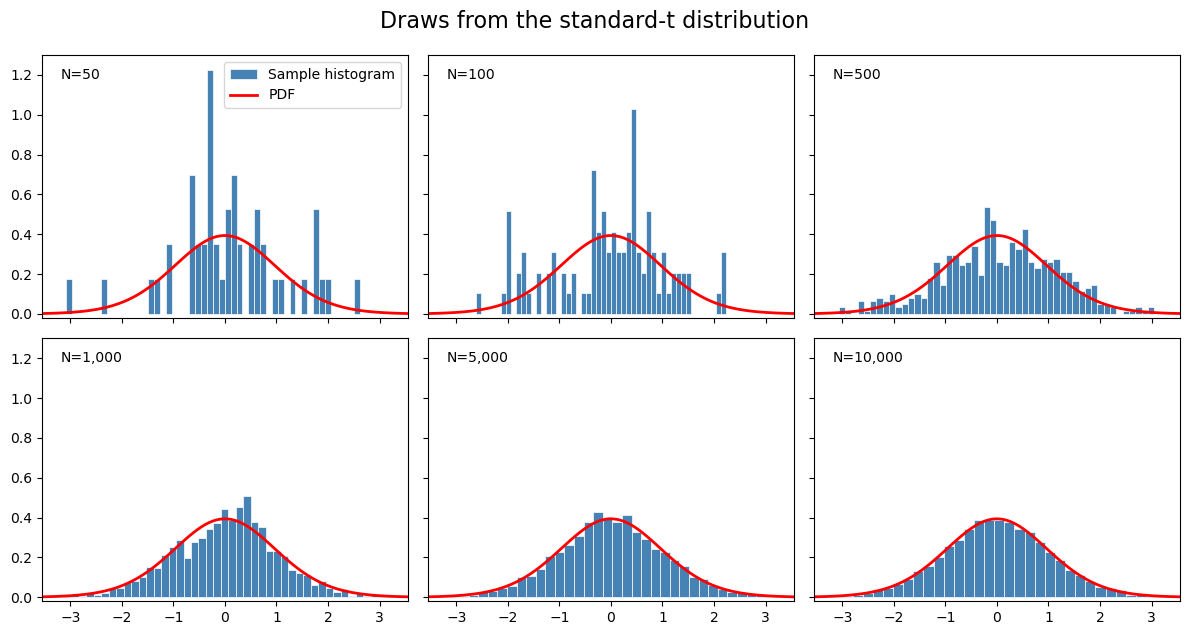

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng
from scipy.stats import t as standard_t

# Sample sizes
Nobs = np.array((50, 100, 500, 1000, 5000, 10000))

# degrees of freedom
df = 20

# Determine xlims such that we cover the (0.1, 99.9) percentiles
# of the distribution.
xmin, xmax = standard_t.ppf((0.001, 0.999), df=df)

xvalues = np.linspace(xmin, xmax, 100)
pdf = standard_t.pdf(xvalues, df=df)

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 6))

# initialize default RNG
rng = default_rng(123)

for i, axes in enumerate(ax.flatten()):
    # Sample size to be plotted in current panel
    N = Nobs[i]
    # Draw sample of size N
    data = rng.standard_t(df=df, size=N)

    # plot histogram of given sample
    axes.hist(data, bins=50, linewidth=0.5, edgecolor='white', 
              color='steelblue', density=True, label='Sample histogram')

    # overlay actual PDF
    axes.plot(xvalues, pdf, color='red', lw=2.0, label='PDF')

    # create text with current sample size
    axes.text(0.05, 0.95, f'N={N:,d}', transform=axes.transAxes, va='top')

    axes.set_xlim((xmin, xmax))
    axes.set_ylim((-0.02, 1.3))

    # plot legend only for the first panel
    if i == 0:
        axes.legend(loc='upper right')

# compress space between individual panels
fig.tight_layout()
# Add overall title
fig.suptitle('Draws from the standard-t distribution', fontsize=16, y=1.05)
    

A few comments on how we create the $x$-values and the plot range for these graphs:

1.  In principle, we could draw arbitrarily large or small realised values, 
    but we want to restrict the plot limits to a reasonable interval.
2.  To find such an interval, we compute the percentiles corresponding
    to 0.1% and 99.9%, which will cover almost any point we'd want to plot.
3.  Moreover, we need to compute the $x$-values and evaluate the 
    PDF at these points only once since these will remain unchanged
    for all sample sizes.

Note also that the `subplots()` function returns a 2-dimensional array 
(since we requested a $2 \times 3$ layout). 
We iterate over the *flattened* array of axes objects instead
of writing two nested loops over rows and columns.

### Solution for exercise 2

Computing the second non-central moment using the first three methods 
is straightforward. All you need to do is to make sure 
that you pass the correct parameters to SciPy's `truncnorm` methods:

In [22]:
import numpy as np
from scipy.stats import truncnorm

# Parameters
mu = 0.0
sigma = 1.0
a = mu - 2*sigma
b = mu + 2*sigma

# Standardised boundaries if underlying non-truncated distr. is
# NOT standard normal
za = (a-mu)/sigma
zb = (b-mu)/sigma

# Method 1: Compute from E[X^2] = Var(X) + E[X]^2
var = truncnorm.var(za, zb, loc=mu, scale=sigma)
mean = truncnorm.mean(za, zb, loc=mu, scale=sigma)
m2_var_mean = var + mean ** 2.0

# Method 2: Compute using moment()
m2 = truncnorm.moment(2, za, zb, loc=mu, scale=sigma)

# Method 3: Compute moment using expect() function
m2_expect = truncnorm.expect(lambda x: x**2.0, args=(za, zb), 
                             loc=mu, scale=sigma)

print(f'Second non-central moment, var + mean^2: {m2_var_mean:.5e}')
print(f'Second non-central moment, moment(): {m2:.5e}')
print(f'Second non-central moment, expect(): {m2_expect:.5e}')


Second non-central moment, var + mean^2: 7.73741e-01
Second non-central moment, moment(): 7.73741e-01
Second non-central moment, expect(): 7.73741e-01


The fourth method is more involved. We first define the integrand as follows:

In [23]:
# Function to compute integrand
def f_integrand(x, a, b, mu, sigma):
    # Transform to boundaries required by SciPy's truncnorm
    za = (a - mu) / sigma
    zb = (b - mu) / sigma
    # Evaluate truncated normal PDF
    pdf = truncnorm.pdf(x, za, zb, loc=mu, scale=sigma)
    # Compute integrand x^2 * f(x)
    result = x ** 2.0 * pdf
    return result

The remainder of the Monte Carlo code look as follows:

In [24]:
from numpy.random import default_rng

# Initialise RNG
rng = default_rng(123)
# Sample size for Monte Carlo integration
Nsample = 50000

# x-values should be uniformly distributed on [a, b]
xsample = rng.uniform(a, b, size=Nsample)
# Alternatively we can also just use equidistant x-values, in
# low-dimensional problems it makes no difference.
# xsample = np.linspace(a, b, Nsamples)

# Evaluate integrand at sampled x-values
integrand = f_integrand(xsample, a, b, mu, sigma)

# Compute size of bounding rectangle:
# the height is taken as the largest realisation of the integrand.
length = b - a
height = np.amax(integrand)
area = height * length
# draw y-values from uniform distribution on [0, height]
ysample = rng.uniform(0, height, size=Nsample)
# Compute fraction of points that are underneath the PDF
frac = np.mean(ysample <= integrand)
integral_MC = frac * area

print(f'Second non-central moment, MC integration: {integral_MC:.5e}')

Second non-central moment, MC integration: 7.72828e-01


You might have noticed that MC integration is not the fastest to converge, but using 50000 
draws is sufficient to get somewhat close to the other three methods.

In this case we do not actually need Monte Carlo methods, because the 
dimensionality of the problem is so low. We could just as well have used a
dense deterministic rectangular grid instead of randomly-drawn points.

The entire Python script which also generates the graphs displayed
in the exercise can be found in the [solutions](../lectures/solutions/unit7) folder 

### Solution for exercise 3

**Part 1**

The first part is purely analytical. We use it to verify
that the code in part 2 yields the correct result.

Since $(r_1, r_2)$ are jointly normal, a standard result is that their sum $r_1 + r_2$
is normally distributed with mean and variance given by

$$\mu_{rr} = E[r_1 + r_2] = 2\mu $$

$$
\sigma^2_{rr} = Var(r_1+r_2) = Var(r_1) + Var(r_2) + 2\cdot Cov(r_1,r_2) = 2\sigma^2 + 2\rho\sigma^2 
$$

This is even simpler than the usual formulas since both per-period log returns have 
the same mean and variance.

Moreover, since $\log R = r_1 + r_2$ is normally distributed, $R$ is log-normally
distributed and has the expected value 
$$
E[R] = \exp\left(\mu_{rr} + \frac{1}{2}\sigma_{rr}^2 \right)
    = \exp\left(2\mu + (1+\rho) \sigma^2 \right)
$$
Since $a = 1$, this is also the expected value of terminal wealth $W$.

We can plug in the parameter values to compute the numerical value:

In [25]:
import numpy as np

# Parameters
a = 1.0                         # Initial assets
mu = np.array((0.04, 0.04))     # average log returns
sigma = 0.16                    # std. dev. of log returns
rho = 0.5                       # serial correlation

# Exact expectation
var_rr = 2.0 * sigma ** 2.0 + 2.0 * rho * sigma ** 2.0
sigma_rr = np.sqrt(var_rr)
mu_rr = np.sum(mu)

exp_exact = a * np.exp(mu_rr + sigma_rr ** 2.0 / 2.0)

print(f'Expected portfolio value (exact): {exp_exact:.4f}')

Expected portfolio value (exact): 1.1257


**Parts 2 and 3**

To perform the Monte Carlo simulation, we need to define the vector
of means and the variance-covariance matrix which we can 
pass to NumPy's `multivariate_normal()` to sample returns $(r_1, r_2)$:

In [26]:
import numpy as np
from numpy.random import default_rng
from scipy.stats import lognorm

# Parameters
a = 1.0                         # Initial assets
mu = np.array((0.04, 0.04))     # average log returns
sigma = 0.16                    # std. dev. of log returns
rho = 0.5                       # serial correlation

# Covariance
cov = rho*sigma**2.0
# variance-covariance matrix
vcv = np.array([[sigma**2.0, cov],
                [cov, sigma**2.0]])

Nsample = 5000000
rng = default_rng(123)
# Draw MV normal samples: each row corresponds to one draw
samples = rng.multivariate_normal(mean=mu, cov=vcv, size=Nsample)

# Evaluate total gross return at sampled points:
#   R = exp(r_1) * exp(r_2)
returns = np.prod(np.exp(samples), axis=1)
# Sampled terminal wealth after 2 periods
wealth = a * returns
# Expected terminal wealth
exp_MC = np.mean(wealth)

print(f'Expected portfolio value (MC): {exp_MC:.4f}')

Expected portfolio value (MC): 1.1256


Finally, we use the sampled points and the `pdf()` method of SciPy's
[lognorm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html) to plot the histogram and the true PDF.

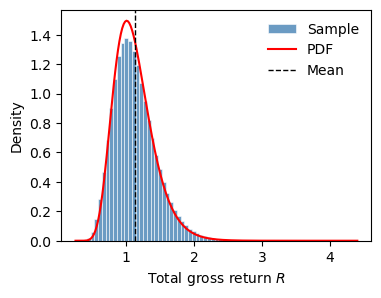

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

ax.hist(returns, bins=75, density=True, color='steelblue', lw=0.5,
        edgecolor='white', alpha=.8, label='Sample')

# Plot log-normal PDF of total gross return
xmin, xmax = np.amin(returns), np.amax(returns)
xvalues = np.linspace(xmin, xmax, 200)
pdf = lognorm.pdf(xvalues, s=sigma_rr, loc=mu_rr)
ax.plot(xvalues, pdf, c='red', lw=1.5, label='PDF')

# Add line with true expected value
ax.axvline(exp_exact, lw=1.0, color='black', ls='--', label='Mean')

ax.set_xlabel('Total gross return $R$')
ax.set_ylabel('Density')
ax.legend(loc='upper right', frameon=False)

The dashed black line shows the analytically derived expected total gross return.

### Solution for exercise 4

We solve the exercise by iterating over all sample sizes, drawing a new log-normal
sample and computing the sample mean and standard error.
These are stored in the arrays `mean_hat` and `std_err`, which we then use 
the generate the plot.

(1.0, 8.0)

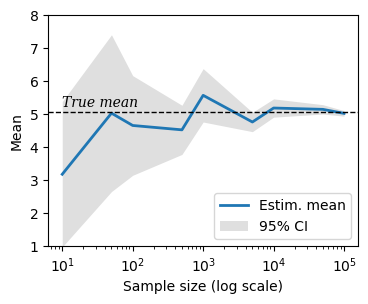

In [28]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt

sample_sizes = np.array([10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000])
# initialize default RNG
rng = default_rng(123)

# Parameters of underlying normal distribution
mu = 0.5
sigma = 1.5

# Array to store estimated mean for each sample size
mean_hat = np.zeros(len(sample_sizes))
# Array to store std. error for each sample size
std_err = np.zeros_like(mean_hat)

for k, N in enumerate(sample_sizes):
    data = rng.lognormal(mean=mu, sigma=sigma, size=N)
    # sample mean
    x_k = np.mean(data)
    # residuals around mean
    resid = data - x_k
    # Residual variance
    var_resid = np.sum(resid**2.0) / (N-1)
    # std. error of mean estimate
    se_k = np.sqrt(var_resid / N)

    # store sample estimates in array
    mean_hat[k] = x_k
    std_err[k] = se_k

# Plot results
plt.plot(sample_sizes, mean_hat, lw=2.0, label='Estim. mean')

# Add line indicating true mean of log-normal
mean = np.exp(mu + sigma**2.0 / 2.0)
plt.axhline(mean, lw=1.0, color='black', ls='--')
plt.text(sample_sizes[0], mean + 0.05, 'True mean', va='bottom',
         fontstyle='italic', fontfamily='serif')

plt.fill_between(sample_sizes, mean_hat - 2*std_err, mean_hat + 2*std_err,
                 color='grey', alpha=0.25, zorder=-1, lw=0.0, 
                 label='95% CI')

plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Sample size (log scale)')
plt.ylabel('Mean')
# Use identical y-lims across ex. 4-6
plt.ylim((1.0, 8.0))



### Solution for exercise 5

Much of this solution proceeds in the very same way as in exercise 4. Additionally,

-   For each sample, we now have to loop over all observations, create a
    sub-sample which omits a particular observation and calculate the mean of 
    this sub-sample.
-   We compute the estimate of the sample mean as the average of all these means.

The code is substantially slower than in exercise 4 as it takes considerable time
to loop over all observations in the larger samples.

Note that the jackknife is rarely used these days as it has been replaced by
other resampling methods such as the bootstrap. The resulting confidence
intervals look identical to the ones in exercise 4 since we have established earlier
that for the sample mean the jackknife estimate of the variance is in
fact identical to the standard approach.

(1.0, 8.0)

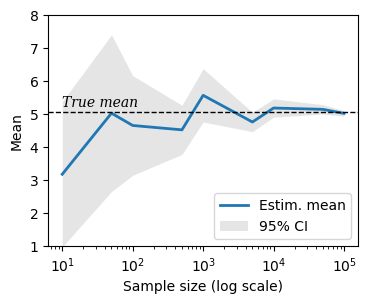

In [29]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt


sample_sizes = np.array([10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000])
# initialize default RNG
rng = default_rng(123)

# Parameters of underlying normal distribution
mu = 0.5
sigma = 1.5

# Array to store estimated mean for each sample size
mean_hat = np.zeros(len(sample_sizes))
# Array to store std. errors for each sample size
std_err = np.zeros_like(mean_hat)

for k, N in enumerate(sample_sizes):
    data = rng.lognormal(mean=mu, sigma=sigma, size=N)

    mean_subsample = np.zeros_like(data)

    # Iterate over all elements, leaving out one element
    # and computing the mean of the resulting sub-sample
    for j in range(N):
        # Initial boolean mask: include all elements
        mask = np.ones_like(data, dtype=bool)
        # leave out j-th observation
        mask[j] = False
        subsample = data[mask]

        x_j = np.mean(subsample)
        mean_subsample[j] = x_j

    # compute sample jackknife mean estimate as average of
    # sub-sample means
    x_k = np.mean(mean_subsample)

    # Compute variance of jackknife mean estimate
    var = (N-1)/N * np.sum((mean_subsample - x_k) ** 2.0)
    # jackknife std. err. of mean estimate
    se = np.sqrt(var)

    # store sample estimates in array
    mean_hat[k] = x_k
    std_err[k] = se

# Plot results
plt.plot(sample_sizes, mean_hat, lw=2.0, label='Estim. mean')

# Add line indicating true mean of log-normal
mean = np.exp(mu + sigma ** 2.0 / 2.0)
plt.axhline(mean, lw=1.0, color='black', ls='--')
plt.text(sample_sizes[0], mean + 0.05, 'True mean', va='bottom',
         fontstyle='italic', fontfamily='serif')

plt.fill_between(sample_sizes, mean_hat - 2*std_err, mean_hat + 2*std_err,
                 color='grey', alpha=0.2, zorder=-1, lw=0.0, 
                 label='95% CI')
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Sample size (log scale)')
plt.ylabel('Mean')
# Use identical y-lims across ex. 4-6
plt.ylim((1.0, 8.0))

### Solution for exercise 6

We first define a function `bootstrap_means()` which takes as given the initial
sample, and

1.  Resamples the desired number of times
2.  For each resample, computes the sample mean
3.  Returns all sample means in an array.



In [30]:
import numpy as np

def boostrap_mean(x, Nrounds):
    means = np.zeros(Nrounds)
    # Sample size
    N = len(x)

    for j in range(Nrounds):
        # Resample with replacement
        resampled = np.random.choice(x, size=N, replace=True)

        # Compute mean of bootstrapped sample
        m = np.mean(resampled)

        means[j] = m

    return means

We use the function `np.random.choice()` to sample from the
initial sample with replacement (passing the argument `replace=True`).

We can then use these bootstrapped means to compute the P2.5 and P97.5 percentiles
using the [`np.percentile()`](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html) function. These represent the bounds of 
the 95% confidence interval.

The remainder of the implementation looks almost identical to 
the previous exercises. We additionally store all bootstrapped means 
in the list `means_all` which we use below to create 
the histograms.

(1.0, 8.0)

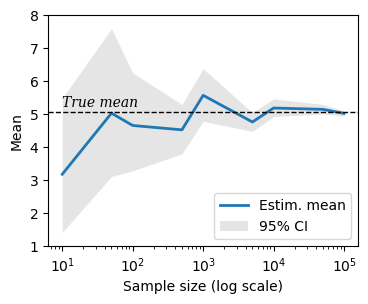

In [31]:
from numpy.random import default_rng
import matplotlib.pyplot as plt

sample_sizes = np.array([10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000])
# Number of bootstraps
Nbs = 999

# initialize default RNG
rng = default_rng(123)

# Parameters of underlying normal distribution
mu = 0.5
sigma = 1.5

# Array to store estimated mean for each sample size
mean_hat = np.zeros(len(sample_sizes))
# Array to store CI lower and upper bounds
bounds = np.zeros((len(sample_sizes), 2))

# Collect all bootstrapped means for each sample size
# to create histograms at the end
means_all = []

for k, N in enumerate(sample_sizes):
    data = rng.lognormal(mean=mu, sigma=sigma, size=N)

    # Mean of original sample
    x_k = np.mean(data)
    mean_hat[k] = x_k

    # bootstrap means
    mean_bs = boostrap_mean(data, Nbs)

    # CI lower and upper bounds at (p2.5, p97.5)
    rank = 2.5, 97.5
    bnd = np.percentile(mean_bs, q=rank)
    bounds[k] = bnd

    # Store in list of all bootstrapped means
    # so we can plot histogram later
    means_all.append(mean_bs)


# Plot results
plt.plot(sample_sizes, mean_hat, lw=2.0, label='Estim. mean')

# Add line indicating true mean of log-normal
mean = np.exp(mu + sigma**2.0 / 2.0)
plt.axhline(mean, lw=1.0, color='black', ls='--')
plt.text(sample_sizes[0], mean + 0.05, 'True mean', va='bottom',
         fontstyle='italic', fontfamily='serif')

plt.fill_between(sample_sizes, bounds[:, 0], bounds[:, 1],
                 color='grey', alpha=0.2, zorder=-1, lw=0.0,
                 label='95% CI')
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Sample size (log scale)')
plt.ylabel('Mean')
# Use identical y-lims across ex. 4-6
plt.ylim((1.0, 8.0))


Finally, the code below creates the histograms for each sample size.
Note the different plot limits on the $x$-axis: the bootstrapped means
for larger sample sizes are much closer together.

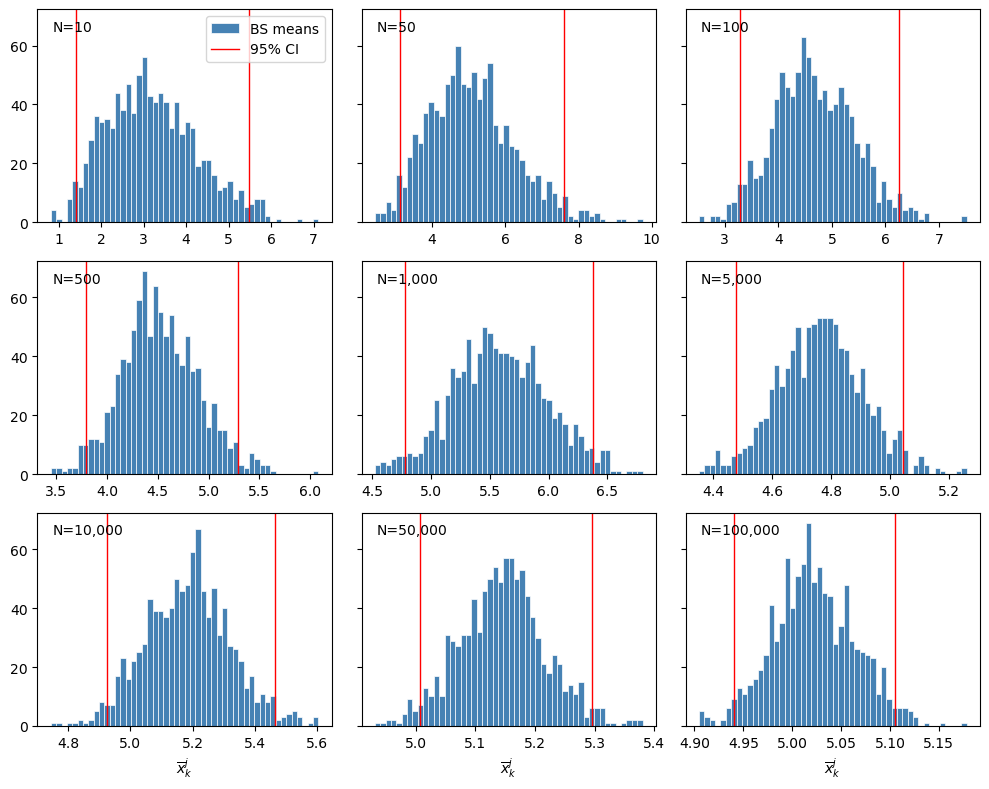

In [32]:
fig, axes = plt.subplots(3, 3, sharex=False, sharey=True, figsize=(10, 8))

for k, ax in enumerate(axes.flatten()):

    N_k = sample_sizes[k]
    means_k = means_all[k]
    ax.hist(means_k, bins=50, color='steelblue', lw=0.5, 
            edgecolor='white', label='BS means')
    ax.axvline(bounds[k, 0], color='red', lw=1.0, label='95% CI')
    ax.axvline(bounds[k, 1], color='red', lw=1.0)

    # add sample size
    ax.text(0.05, 0.95, f'N={N_k:,d}', transform=ax.transAxes, va='top')

    if k == 0:
        ax.legend(loc='upper right')

    if k > 5:
        ax.set_xlabel(r'$\overline{x}_{k}^j$')

fig.tight_layout()

As an aside, the use of the bootstrap in this scenario is somewhat nonsensical
and only serves to practice doing data analysis with Python. 
We use bootstrapping in settings where we don't know the 
underlying distribution, so we are forced to use the data 
we have as the population from which we resample with replacement.
Here, we of course know that the data is log-normally distributed,
so we could just draw new samples from that distribution directly.